<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
!pip install keras-tuner 

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import keras_tuner as kt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers,models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import tensorflow as tf

SEED = 42
import random
random.seed(SEED)
tf.random.set_seed(SEED)

## Load the dataset

In [3]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_01/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_01/y_data.csv"

## Check dataset behaviour

In [4]:
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,1,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,1,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,1,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
X["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [7]:
X.shape

(7043, 25)

In [8]:
y.shape

(7043, 1)

### Split Data into Training, Validation, and Test Sets

In [9]:
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4930, 25)
Shape of y_train: (4930, 1)
Shape of X_val: (1056, 25)
Shape of y_val: (1056, 1)
Shape of X_test: (1057, 25)
Shape of y_test: (1057, 1)


In [10]:
np.sum(y_val==1)

c:\Users\chanu\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Churn    280
dtype: int64

In [11]:
np.sum(y_val==0)

Churn    776
dtype: int64

In [12]:
# Initialize the scaler
scaler = StandardScaler()

# FIT AND TRANSFORM the training data 
X_train = scaler.fit_transform(X_train)

# TRANSFORM the test data 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [13]:
X_train[0]

array([-0.43814715, -0.96295739, -0.65086184, -1.11472828,  0.33445908,
       -0.85678685, -0.63699286, -0.73200106, -0.73265479, -0.64581257,
        1.2409383 , -0.80242214, -1.20529512,  0.50428615, -0.83787772,
       -0.72059725,  1.12453737, -0.52587133,  0.90731739, -0.51517027,
       -0.5647009 , -0.53152442, -0.52555704,  1.40735673, -0.54312331])

In [14]:
y_train = y_train.squeeze()    
y_val   = y_val.squeeze()
y_test  = y_test.squeeze()

Text(0.5, 1.0, 'Count Plot for Churn')

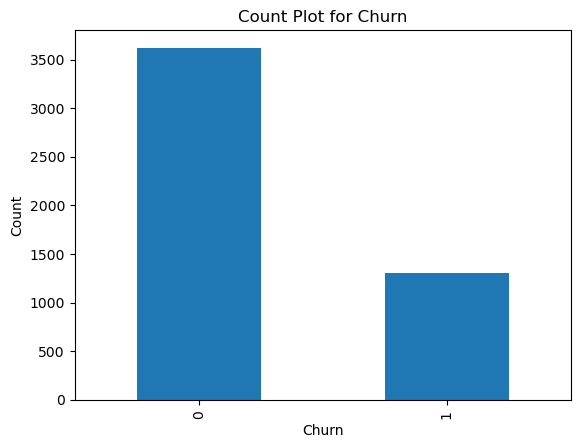

In [15]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

Text(0.5, 1.0, 'Count Plot for Churn')

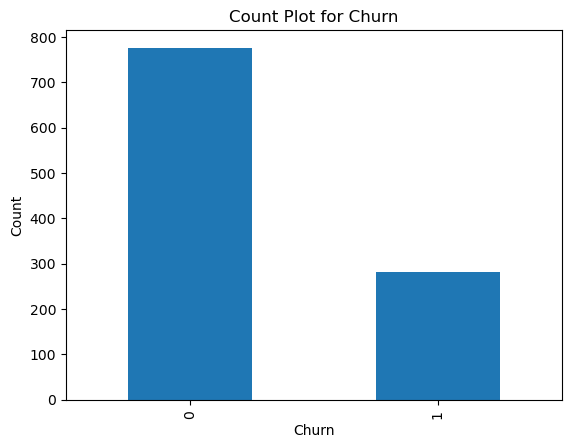

In [16]:
count=y_test.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [17]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()





## Train Neural Network

#### Experiment 01

In [18]:
input_dim=X_train.shape[1]
input_dim

25

In [19]:
# ,kernel_regularizer=keras.regularizers.l2(0.001) 

In [20]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")

Class weights: {0: np.float64(0.680563224737714), 1: np.float64(1.8845565749235473)}


In [21]:
def make_baseline_model(input_dim):

    model = models.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),        
        
        layers.Dense(128, activation='relu'),
        
        layers.Dense(64, activation='relu'),
               
        layers.Dense(1, activation='sigmoid')
    ])

    return model

model=make_baseline_model(input_dim)
model.summary()


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=[keras.metrics.AUC(name='auc'), 'accuracy',
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')
            ]
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    batch_size=16,
    verbose=2,
    class_weight=class_weight_dict

)

c:\Users\chanu\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
309/309 - 2s - 6ms/step - accuracy: 0.6974 - auc: 0.7915 - loss: 0.5740 - precision: 0.4590 - recall: 0.7867 - val_accuracy: 0.7150 - val_auc: 0.8238 - val_loss: 0.5397 - val_precision: 0.4782 - val_recall: 0.8214
Epoch 2/60
309/309 - 0s - 1ms/step - accuracy: 0.7347 - auc: 0.8372 - loss: 0.5006 - precision: 0.5000 - recall: 0.8081 - val_accuracy: 0.7206 - val_auc: 0.8327 - val_loss: 0.5290 - val_precision: 0.4842 - val_recall: 0.8214
Epoch 3/60
309/309 - 1s - 2ms/step - accuracy: 0.7398 - auc: 0.8440 - loss: 0.4890 - precision: 0.5060 - recall: 0.8096 - val_accuracy: 0.7225 - val_auc: 0.8366 - val_loss: 0.5242 - val_precision: 0.4861 - val_recall: 0.8143
Epoch 4/60
309/309 - 1s - 2ms/step - accuracy: 0.7432 - auc: 0.8477 - loss: 0.4833 - precision: 0.5101 - recall: 0.8089 - val_accuracy: 0.7235 - val_auc: 0.8385 - val_loss: 0.5203 - val_precision: 0.4871 - val_recall: 0.8071
Epoch 5/60
309/309 - 1s - 2ms/step - accuracy: 0.7469 - auc: 0.8503 - loss: 0.4793 - precision: 0.51

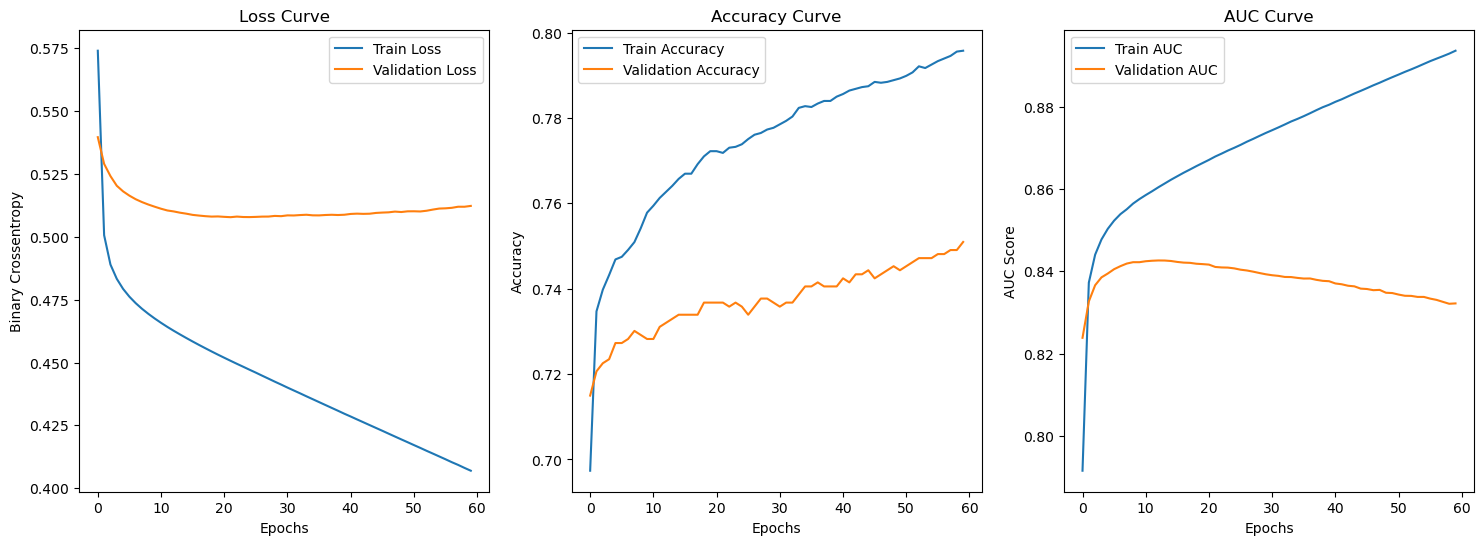

In [22]:
plot_history(history)

In [37]:

test_results = model.evaluate(X_test, y_test, verbose=0)

test_loss     = test_results[0]
test_auc      = test_results[1]
test_accuracy = test_results[2]
test_precision = test_results[3]
test_recall    = test_results[4]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, (model.predict(X_test) >= 0.5).astype(int)))

train_accuracy = history.history['accuracy'][-1]
val_accuracy   = history.history['val_accuracy']
train_loss     = history.history['loss']
val_loss       = history.history['val_loss']
train_auc= roc_auc_score(y_train, model.predict(X_train))

train_precision = history.history['precision'][-1]
train_recall = history.history['recall'][-1]

print(" Training Accuracy:", train_accuracy)
print(" Validation Accuracy:", val_accuracy[-1])
print(" Training Loss:", train_loss[-1])
print(" Validation Loss:", val_loss[-1])
print(" Train AUC:", train_auc)

Test Loss: 0.4827
Test AUC: 0.8361
Test Accuracy: 0.7436
Test Precision: 0.5120
Test Recall: 0.7580

Classification Report:
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       776
           1       0.51      0.76      0.61       281

    accuracy                           0.74      1057
   macro avg       0.70      0.75      0.71      1057
weighted avg       0.79      0.74      0.76      1057

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
 Training Accuracy: 0.7957403659820557
 Validation Accuracy: 0.7509469985961914
 Training Loss: 0.40696054697036743
 Validation Loss: 0.5123074054718018
 Train AUC: 0.8975707197098263


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


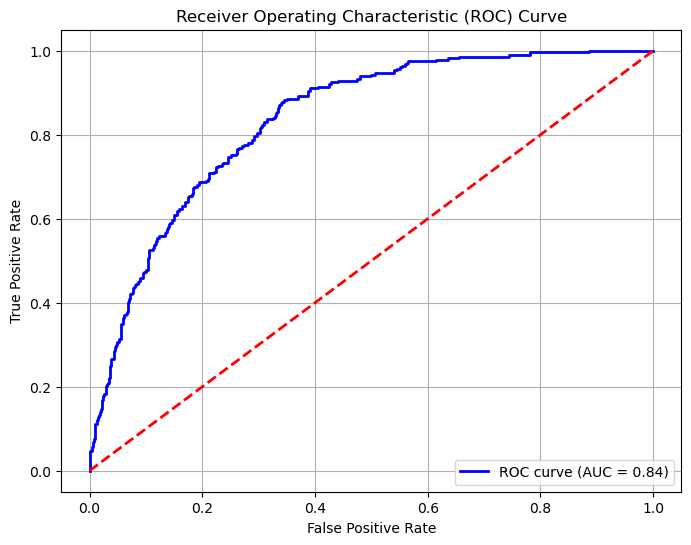

In [27]:
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Text(45.722222222222214, 0.5, 'True Label')

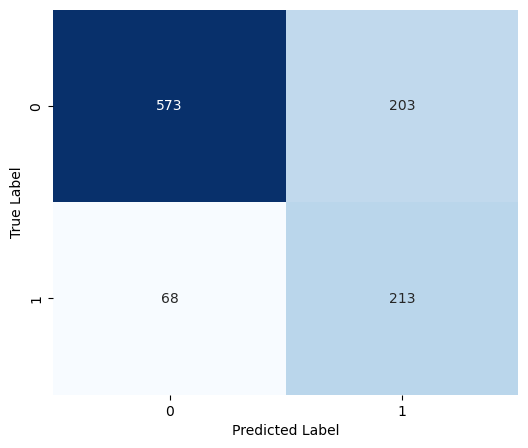

In [25]:
cm=confusion_matrix(y_test, (model.predict(X_test) >= 0.5).astype(int))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

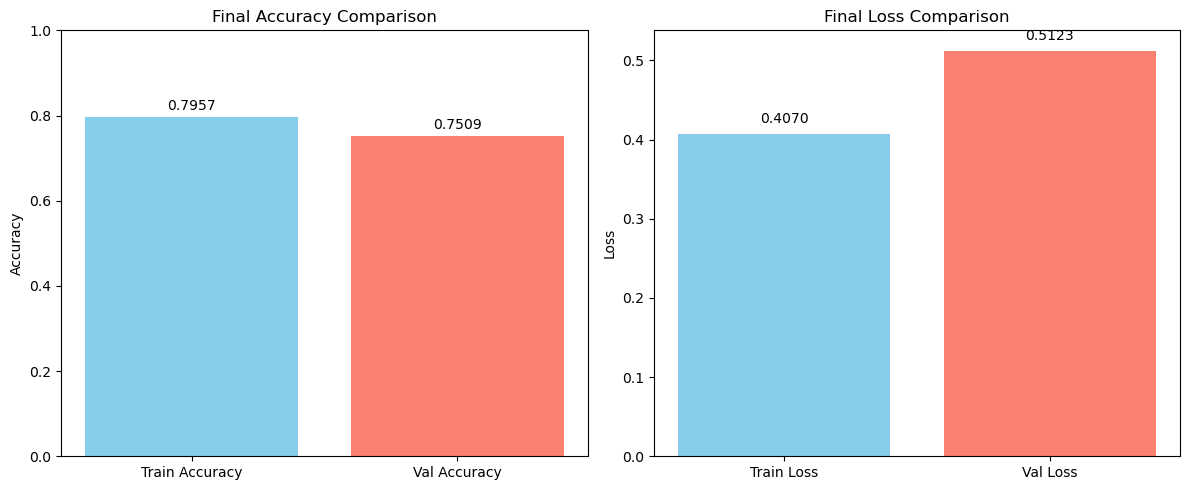

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Final values (last epoch)
final_train_acc = history.history['accuracy'][-1]
final_val_acc   = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss   = history.history['val_loss'][-1]

# --- Accuracy Bar Plot ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
bars = plt.bar(['Train Accuracy','Val Accuracy'],
               [final_train_acc, final_val_acc],
               color=['skyblue','salmon'])
plt.title('Final Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
             f"{yval:.4f}", ha='center', va='bottom')

# --- Loss Bar Plot ---
plt.subplot(1,2,2)
bars = plt.bar(['Train Loss','Val Loss'],
               [final_train_loss, final_val_loss],
               color=['skyblue','salmon'])
plt.title('Final Loss Comparison')
plt.ylabel('Loss')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
             f"{yval:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


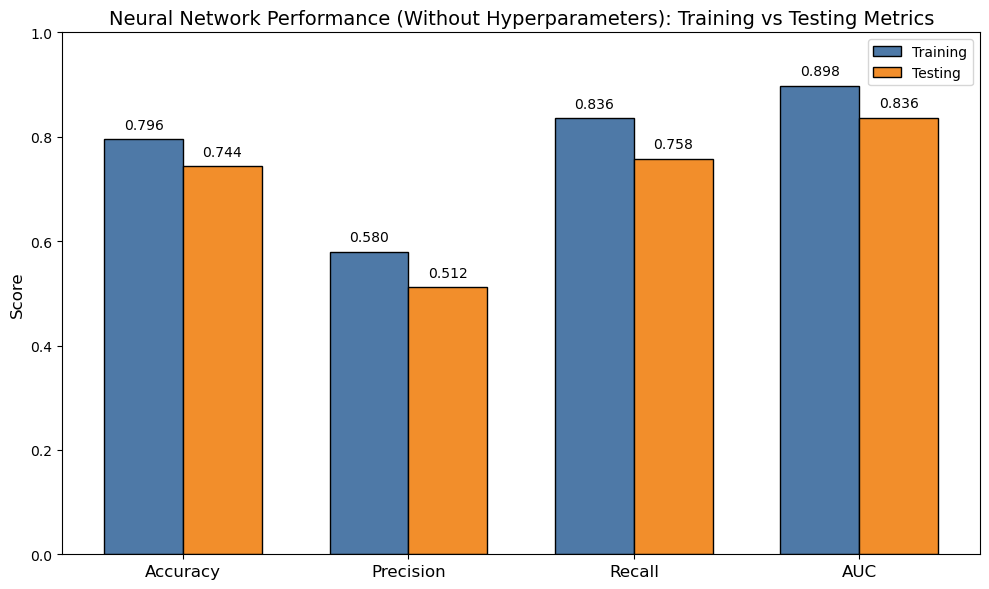

In [39]:
import numpy as np
import matplotlib.pyplot as plt

 
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']

train_values = [train_accuracy, train_precision, train_recall, train_auc]
test_values  = [test_accuracy, test_precision, test_recall, test_auc]

 
x = np.arange(len(metrics))
width = 0.35

 
plt.figure(figsize=(10,6))

plt.bar(x - width/2, train_values, width,
        label='Training', color='#4E79A7', edgecolor='black')     # navy blue

plt.bar(x + width/2, test_values, width,
        label='Testing', color='#F28E2B', edgecolor='black')      # orange

# --- Labels ---
plt.xticks(x, metrics, fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Neural Network Performance (Without Hyperparameters): Training vs Testing Metrics", fontsize=14)
plt.ylim(0, 1)
plt.legend()

# --- Display values on bars ---
for i, v in enumerate(train_values):
    plt.text(i - width/2, v + 0.02, f"{v:.3f}", ha='center')

for i, v in enumerate(test_values):
    plt.text(i + width/2, v + 0.02, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()
